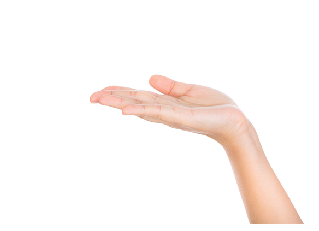

In [1]:
# 1. 이미지 출력하기
import cv2
from matplotlib import pyplot as plt
imageFile = './images/hand2.jpg'
imgBGR = cv2.imread(imageFile) 
plt.axis('off')

imgRGB = cv2.cvtColor(imgBGR, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)
plt.show()

In [2]:
# 2. 비디오 캡처와 화면 표시
import cv2
cap = cv2.VideoCapture(0)
frame_size = (int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
              int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
print('frame_type:', type(frame_size), 'frame_size=', frame_size)

while True:
    retval, frame = cap.read()
    if not retval:
        break
    cv2.imshow('frame',frame)
    
    key = cv2.waitKey(25)
    if key==27:
        break
if cap.isOpened():
    cap.release()
cv2.destroyAllWindows()

frame_type: <class 'tuple'> frame_size= (640, 480)


In [3]:
# 3. 흑백영상 접근
import cv2
img = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
print(img[100:110, 200:210]) # Roi 접근

for y in range(100,400):
    for x in range(200,300):
        img[y,x]=0

img[100:400, 200:300]=0 # ROI접근

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()


[[153 153 150 141 151 150 151 145 144 144]
 [146 144 151 155 148 149 146 148 145 145]
 [139 146 157 148 142 146 148 146 144 140]
 [145 153 146 135 139 147 149 148 140 138]
 [151 149 139 142 148 150 149 141 142 147]
 [151 144 143 151 152 150 139 138 145 144]
 [149 151 149 151 149 148 150 143 142 141]
 [159 149 145 146 150 151 152 144 132 137]
 [151 144 144 144 152 149 139 134 140 144]
 [142 142 151 151 143 142 133 143 146 136]]


![3grayimage](output_image/3grayimage.PNG)

In [4]:
# 4. 컬러 영상 접근
import cv2
img = cv2.imread('./images/lena.png')
img[100,200]=[255,0,0] # 컬러 BGR 접근
print(img[100, 200:210]) # ROI 접근

for y in range(100,400):
    for x in range(200,300):
        img[y,x] = [255,0,0] # 파란색으로 변경
img[100:400, 200:300]=[255,0,0] # ROI 접근

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

[[255   0   0]
 [109 117 213]
 [113 115 208]
 [114 101 199]
 [121 116 207]
 [105 114 209]
 [112 113 212]
 [107 109 204]
 [117 108 200]
 [110 109 202]]


![4colorimage](output_image/4colorimage.PNG)

In [6]:
# 5.마우스로 ROI 영역 지정 (드래그)
# roi = (206, 236, 71, 150)인데 -> roi[0]은 x열 roi[1]은 y행, roi[2]는 width, roi[3]은 height
import cv2
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
roi = cv2.selectROI(src) # 마우스로 ROI 영역 지정 

print('roi=', roi)

# img에 roi영역 저장.
img = src[roi[1]:roi[1] + roi[3],
          roi[0]:roi[0] + roi[2]]

cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()

roi= (67, 35, 409, 426)


![5roiimage](output_image/5roiimage.PNG)

In [7]:
# 6. 영상 복사 copy와 참조 차이
import cv2
src = cv2.imread('./images/lena.png')

dst2 = src
dst = src.copy() # 복사

src[100:400, 200:300]=0

cv2.imshow('src',src)
cv2.imshow('dst',dst)
cv2.imshow('dst2',dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
# 7. 영상 크기 변환, 회전
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
dst = cv2.resize(src, dsize = (320,240)) # resize 가로 320 세로 240으로
dst2 = cv2.resize(src, dsize=(0,0), fx=1.5, fy=1.2) # resize 가로 1.5배 세로 1.2배

dst_rotate = cv2.rotate(src, cv2.ROTATE_90_CLOCKWISE)
dst_rotate2 = cv2.rotate(src, cv2.ROTATE_90_COUNTERCLOCKWISE)
cv2.imshow('dst1',dst) # 가로세로 고정크기
cv2.imshow('dst2',dst2) # 가로 배율로 늘리기
cv2.imshow('dst_roate',dst_rotate) # 회전 시계방향
cv2.imshow('dst_rotate2',dst_rotate2) # 회전 반시계
cv2.waitKey()
cv2.destroyAllWindows()

![7rotate](output_image/7rotate.PNG)

In [9]:
# 8. 영상 어파인 변환 (확대/축소, 회전)
import cv2
import numpy as np
src = cv2.imread('./images/lena.png')

rows, cols, channels = src.shape
M1 = cv2.getRotationMatrix2D((rows/2, cols/2), 45, 0.5) # getRotataionMatrix2D( center, angle, scale) 
M2 = cv2.getRotationMatrix2D((rows/2, cols/2), -45, 1.0) 

dst1 = cv2.warpAffine(src, M1, (rows, cols)) # warpAffine( src, M, dsize) -> M은 변환행렬
dst2 = cv2.warpAffine(src, M2, (rows, cols))

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

![8affine](output_image/8affine.PNG)

In [10]:
# 9. 임계값 영상
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
print('ret=',ret)
cv2.imshow('dst',dst)

# thresh_otsu를 추가하면 임계값 thresh와 관계없이 otsu알고리즘으로 최적 임계값 계산 됨0
ret2, dst2 = cv2.threshold(src,200,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)# 즉 여기선 주어진 임계값 200이 아닌 170이 threshold가 됨.
print("ret2=",ret2)
cv2.imshow('dst2',dst2)

cv2.waitKey()
cv2.destroyAllWindows()

ret= 120.0
ret2= 124.0


![9threshold](output_image/9threshold.PNG)

In [11]:
# 10. 적응형 임계값 영상
import cv2
import numpy as np
src = cv2.imread('./images/lena.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',src)

ret,dst = cv2.threshold(src,0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
cv2.imshow('dst',dst)

# 젤 괜찮은 방법1
dst2 = cv2.adaptiveThreshold(src,255,cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2',dst2)

# 젤 괜찮은방법2
dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3',dst3)

cv2.waitKey()
cv2.destroyAllWindows()

![10adaptivethreshold](output_image/10adaptivethreshold.PNG)